In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import scipy.io

In [2]:
mat_file= scipy.io.loadmat('LOSS.mat')
mat_file_pay = scipy.io.loadmat('PAY.mat')

np_array = np.array(mat_file['LOSS'])
df6 = pd.DataFrame(np_array)
df6.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']
df6.insert(len(df6.columns),'Loss', 1)
df6.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


In [3]:
df7 = pd.DataFrame(np.array(mat_file_pay['PAY']))
df7.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']
df7.insert(len(df7.columns),'Loss', 0)
df7.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
0,601087.0,1.73,41.8,5800000.0,5.19,0.0312,5.1588,1955.0,77.8,15149.0,5.231393,98.917029,0.358684,4.242222,0.423695,0.577329,4.0,0
1,352982.0,1.30,60.1,3200000.0,5.55,0.0812,5.4688,1986.0,100.0,24668.0,8.694138,445.191571,1.937487,4.242222,0.090875,0.066759,6.0,0
2,489518.0,1.87,36.9,3100000.0,5.39,0.0312,5.3588,1999.0,100.0,44813.0,6.993114,275.089206,0.997503,4.242222,0.345052,0.351724,6.0,0
3,464180.0,1.40,65.4,5100000.0,5.21,0.0712,5.1388,1978.0,84.6,32364.0,7.196589,295.436693,2.766837,4.242222,0.209496,0.154483,1.0,0
4,576244.0,1.26,61.5,6600000.0,5.16,0.0312,5.1288,1979.0,90.1,30491.0,6.332352,209.012943,1.957457,4.242222,0.260073,0.217952,26.0,0


In [5]:
data_clean = pd.concat([df6,df7], ignore_index = True)
print(data_clean)

            NOI    DSCR      LTV     Balance  Rate     Fee  Net Mortgage Rate  \
0      697399.0  1.3500  69.4000  7250000.00  5.25  0.0312             5.2188   
1     1088638.0  1.3600  61.3000  9100000.00  5.52  0.0312             5.4888   
2      618081.0  1.3100  66.0000  6650000.00  5.45  0.0312             5.4188   
3      260695.0  1.5500  64.2000  2600000.00  5.21  0.1112             5.0988   
4      607133.0  1.2600  65.8000  6500000.00  5.29  0.0312             5.2588   
...         ...     ...      ...         ...   ...     ...                ...   
4788   156294.0  1.4442  54.1815  1029447.80  7.40  0.0624             7.3376   
4789   172837.0  1.3260  61.6591  1257845.64  7.40  0.0624             7.3376   
4790   104557.0  1.2949  67.2535   823855.65  7.50  0.0624             7.4376   
4791   737888.0  1.3268  73.3318  5679548.69  8.28  0.0624             8.2176   
4792   482735.0  1.2779  72.5958  3629791.06  8.35  0.0624             8.2876   

      Year Built  Occupancy

In [6]:
data_clean.corr()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
NOI,1.000000,0.122950,-0.015557,0.904979,-0.092564,-0.099187,-0.088382,-0.004661,-0.097906,-0.099355,-0.039261,-0.031610,-0.013732,-0.028327,0.941002,0.938568,-0.025669,-0.033794
DSCR,0.122950,1.000000,-0.400696,0.038571,-0.158859,-0.006513,-0.158908,-0.057814,-0.055856,-0.027073,0.062389,0.099111,0.028159,-0.132254,0.142474,0.162486,0.022581,-0.094803
LTV,-0.015557,-0.400696,1.000000,0.088660,0.072736,0.007184,0.074860,0.106693,0.035194,-0.018046,-0.037836,-0.072655,0.022562,0.125718,-0.018622,-0.033788,-0.051427,0.185997
Balance,0.904979,0.038571,0.088660,1.000000,-0.134484,-0.141188,-0.128766,-0.004555,-0.082617,-0.078491,-0.181428,-0.172316,-0.058362,-0.035737,0.842617,0.872621,-0.037524,-0.016545
Rate,-0.092564,-0.158859,0.072736,-0.134484,1.000000,0.265024,0.993967,-0.052757,0.016078,-0.027228,0.356323,0.143955,0.030534,0.775484,-0.087840,-0.111365,-0.041804,0.045590
Fee,-0.099187,-0.006513,0.007184,-0.141188,0.265024,1.000000,0.230023,0.022689,0.063613,-0.007794,0.264194,0.228534,-0.025352,0.133246,-0.085985,-0.085975,-0.002223,-0.020853
Net Mortgage Rate,-0.088382,-0.158908,0.074860,-0.128766,0.993967,0.230023,1.000000,-0.050146,0.014589,-0.025839,0.347239,0.135462,0.030513,0.773203,-0.084010,-0.107677,-0.040708,0.047168
Year Built,-0.004661,-0.057814,0.106693,-0.004555,-0.052757,0.022689,-0.050146,1.000000,-0.033207,0.086123,-0.028604,-0.018969,0.033025,-0.035368,-0.000924,-0.009677,-0.287432,0.010995
Occupancy,-0.097906,-0.055856,0.035194,-0.082617,0.016078,0.063613,0.014589,-0.033207,1.000000,0.071285,-0.074684,-0.095288,-0.083508,0.073618,-0.163542,-0.102381,0.072179,-0.045576
ZipPop,-0.099355,-0.027073,-0.018046,-0.078491,-0.027228,-0.007794,-0.025839,0.086123,0.071285,1.000000,-0.088917,-0.087453,0.005195,-0.006626,-0.097969,-0.088293,0.047940,-0.020596


<AxesSubplot:>

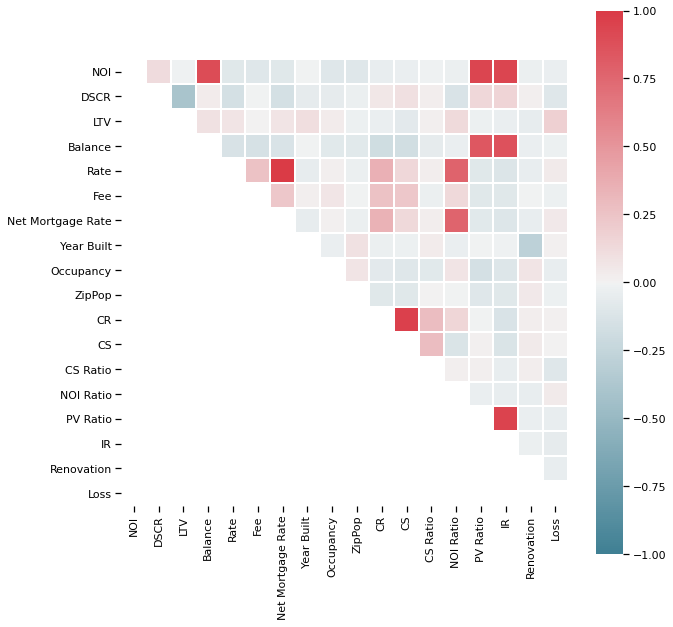

In [7]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)



#WE SHOULD DROP VARIABLES WITH HIGH CORRELATION
#df = df.drop(columns = ['',...])

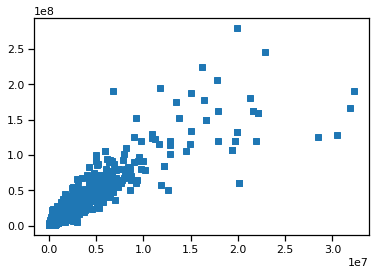

In [14]:
plt.plot(data_clean['NOI'],data_clean['Balance'],'s')

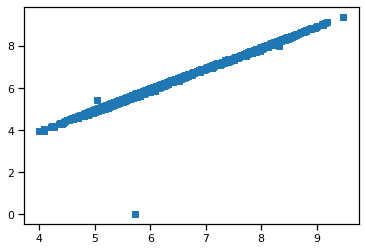

In [15]:
plt.plot(data_clean['Rate'],data_clean['Net Mortgage Rate'],'s')

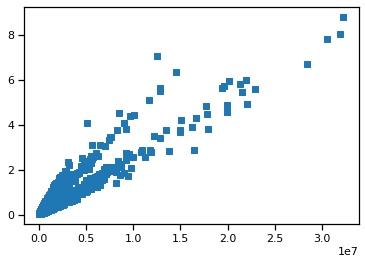

In [16]:
plt.plot(data_clean['NOI'],data_clean['PV Ratio'],'s')

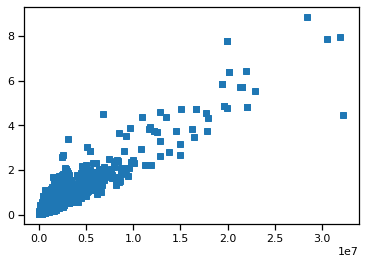

In [17]:
plt.plot(data_clean['NOI'],data_clean['IR'],'s')

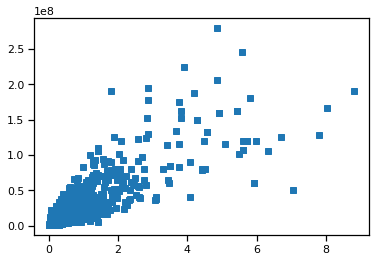

In [18]:
plt.plot(data_clean['PV Ratio'],data_clean['Balance'],'s')

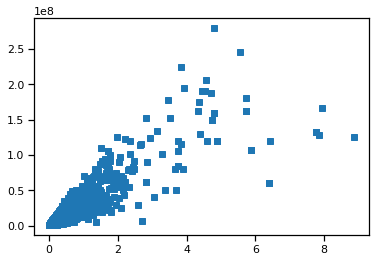

In [20]:
plt.plot(data_clean['IR'],data_clean['Balance'],'s')

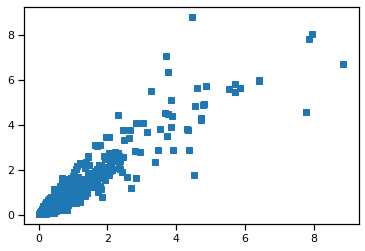

In [21]:
plt.plot(data_clean['IR'],data_clean['PV Ratio'],'s')

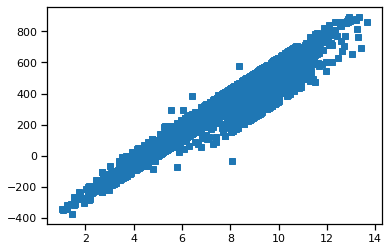

In [27]:
plt.plot(data_clean['CR'],data_clean['CS'],'s')

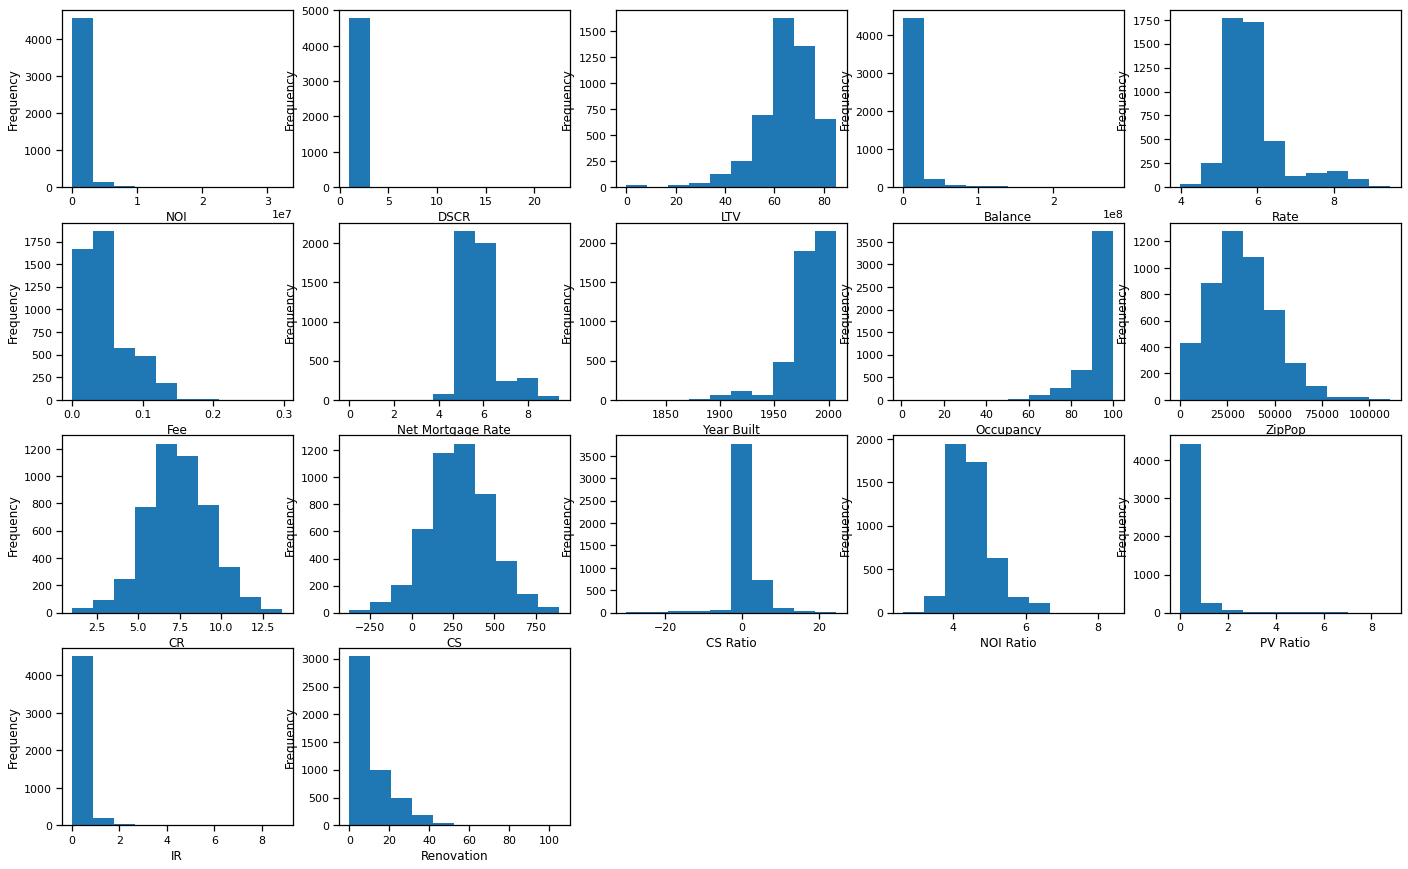

In [41]:
numeric_vars = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']

# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(4, 5, i+1)
    sub.set_xlabel(var)
    data_clean[var].plot(kind = 'hist')